<a href="https://colab.research.google.com/github/cagutierrezc/proyectoColaboratory/blob/main/Analisis_Dataset_Centros_Sena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: importame pandas y matplotlib

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
url = 'https://raw.githubusercontent.com/cagutierrezc/proyectoColaboratory/main/Georeferenciaci_n_Centros_de_Aprendizaje_SENA_20240731.csv'
df = pd.read_csv(url)
df.head()

,CENTRO_FORMACION,CODIGO_CENTRO,LATITUD,LONGITUD,GEORREFERENCIACION,NOMBRE_REGIONAL,CODIGO_REGIONAL,NOMBRE_DEPARTAMENTO,CODIGO_DEPARTAMENTO,NOMBRE_MUNICIPIO,CODIGO_MUNICIPIO
0,CENTRO DE LOS RECURSOS NATURALES RENOVABLES - ...,9101,6.053527,-75.62891,POINT (-75.62891 6.053527),5,REGIONAL ANTIOQUIA,ANTIOQUIA,5,MEDELLIN,1
1,CENTRO PARA EL DESARROLLO AGROECOLOGICO Y AGRO...,9103,10.987720,-74.78277,POINT (-74.78277 10.98772),8,REGIONAL ATLANTICO,ATLANTICO,8,BARRANQUILLA,1
2,CENTRO AGROEMPRESARIAL Y MINERO,9104,10.373000,-75.46100,POINT (-75.461 10.373),13,REGIONAL BOLIVAR,BOLIVAR,13,CARTAGENA,1
3,CENTRO DE DESARROLLO AGROPECUARIO Y AGROINDUST...,9110,5.825560,-73.02979,POINT (-73.02979 5.82556),15,REGIONAL BOYACA,BOYACA,15,TUNJA,1
4,CENTRO PARA LA FORMACION CAFETERA,9112,5.032900,-75.45060,POINT (-75.4506 5.0329),17,REGIONAL CALDAS,CALDAS,17,MANIZALES,1


In [3]:
df.tail()

,CENTRO_FORMACION,CODIGO_CENTRO,LATITUD,LONGITUD,GEORREFERENCIACION,NOMBRE_REGIONAL,CODIGO_REGIONAL,NOMBRE_DEPARTAMENTO,CODIGO_DEPARTAMENTO,NOMBRE_MUNICIPIO,CODIGO_MUNICIPIO
113,CENTRO PARA LA BIODIVERSIDAD Y EL TURISMO DEL ...,9517,-4.210806,-69.945538,POINT (-69.945538 -4.210806),91,REGIONAL AMAZONAS,AMAZONAS,91,LETICIA,1
114,CENTRO AMBIENTAL Y ECOTURISTICO DEL NORORIENTE...,9547,3.874345,-67.921817,POINT (-67.921817 3.874345),94,REGIONAL GUAINIA,GUAINIA,94,PTO INIRIDA,1
115,"CENTRO DE DESARROLLO AGROINDUSTRIAL, TURISTICO...",9533,2.561174,-72.642749,POINT (-72.642749 2.561174),95,REGIONAL GUAVIARE,META,50,PUERTO CONCORDIA,450
116,CENTRO AGROPECUARIO Y DE SERVICIOS AMBIENTALES...,9548,1.249076,-70.235523,POINT (-70.235523 1.249076),97,REGIONAL VAUPES,VAUPES,97,MITU,1
117,CENTRO DE PRODUCCION Y TRANSFORMACION AGROINDU...,9531,6.181997,-67.485291,POINT (-67.485291 6.181997),99,REGIONAL VICHADA,VICHADA,99,PUERTO CARRENO,1


In [4]:
registros_con_comillas_dobles = df['CENTRO_FORMACION'].str.contains('"').sum()
registros_con_comillas_simples = df['CENTRO_FORMACION'].str.contains("'").sum()
total_registros_con_comillas = registros_con_comillas_dobles + registros_con_comillas_simples

total_registros_con_comillas

0

In [5]:
registros_con_comas = df['CENTRO_FORMACION'].str.contains(',').sum()

registros_con_comas

1

In [6]:
df['CENTRO_FORMACION'] = df['CENTRO_FORMACION'].str.replace(',', '').str.replace("'", '')

In [7]:
registros_con_comas = df['CENTRO_FORMACION'].str.contains(',').sum()

registros_con_comas

0

In [8]:
registros_con_puntoycomas = df['CENTRO_FORMACION'].str.contains(';').sum()

registros_con_puntoycomas

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CENTRO_FORMACION     118 non-null    object 
 1   CODIGO_CENTRO        118 non-null    int64  
 2   LATITUD              118 non-null    float64
 3   LONGITUD             118 non-null    float64
 4   GEORREFERENCIACION   118 non-null    object 
 5   NOMBRE_REGIONAL      118 non-null    int64  
 6   CODIGO_REGIONAL      118 non-null    object 
 7   NOMBRE_DEPARTAMENTO  118 non-null    object 
 8   CODIGO_DEPARTAMENTO  118 non-null    int64  
 9   NOMBRE_MUNICIPIO     118 non-null    object 
 10  CODIGO_MUNICIPIO     118 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 10.3+ KB


In [10]:
num_registros = df.shape[0]
print(f"El número de registros en el dataset es: {num_registros}")

El número de registros en el dataset es: 118


In [11]:
df.isnull().sum()

,0
CENTRO_FORMACION,0
CODIGO_CENTRO,0
LATITUD,0
LONGITUD,0
GEORREFERENCIACION,0
NOMBRE_REGIONAL,0
CODIGO_REGIONAL,0
NOMBRE_DEPARTAMENTO,0
CODIGO_DEPARTAMENTO,0
NOMBRE_MUNICIPIO,0


###Todas las filas de nuestro conjunto de datos tienen valores

In [12]:
duplicados_centro_formacion = df[df.duplicated(subset=['CODIGO_CENTRO'])]
print("Filas con 'CENTRO_FORMACION' duplicado:")
print(duplicados_centro_formacion)

Filas con 'CENTRO_FORMACION' duplicado:
                                      CENTRO_FORMACION  CODIGO_CENTRO  \
111            CENTRO AGROFORESTAL Y ACUICOLA ARAPAIMA           9518   
112  CENTRO DE FORMACION TURISTICA GENTE DE MAR Y D...           9539   
113  CENTRO PARA LA BIODIVERSIDAD Y EL TURISMO DEL ...           9517   
114  CENTRO AMBIENTAL Y ECOTURISTICO DEL NORORIENTE...           9547   
116  CENTRO AGROPECUARIO Y DE SERVICIOS AMBIENTALES...           9548   
117  CENTRO DE PRODUCCION Y TRANSFORMACION AGROINDU...           9531   

       LATITUD   LONGITUD            GEORREFERENCIACION  NOMBRE_REGIONAL  \
111   0.505059 -76.501705   POINT (-76.501705 0.505059)               86   
112  12.576799 -81.701032  POINT (-81.701032 12.576799)               88   
113  -4.210806 -69.945538  POINT (-69.945538 -4.210806)               91   
114   3.874345 -67.921817   POINT (-67.921817 3.874345)               94   
116   1.249076 -70.235523   POINT (-70.235523 1.249076)             

In [13]:
codigo_buscar = 9548
resultado = df[df['CODIGO_CENTRO'] == codigo_buscar]
print(resultado)

                                      CENTRO_FORMACION  CODIGO_CENTRO  \
98   CENTRO AGROPECUARIO Y DE SERVICIOS AMBIENTALES...           9548   
116  CENTRO AGROPECUARIO Y DE SERVICIOS AMBIENTALES...           9548   

      LATITUD   LONGITUD           GEORREFERENCIACION  NOMBRE_REGIONAL  \
98   1.249076 -70.235523  POINT (-70.235523 1.249076)               97   
116  1.249076 -70.235523  POINT (-70.235523 1.249076)               97   

     CODIGO_REGIONAL NOMBRE_DEPARTAMENTO  CODIGO_DEPARTAMENTO  \
98   REGIONAL VAUPES              VAUPES                   97   
116  REGIONAL VAUPES              VAUPES                   97   

    NOMBRE_MUNICIPIO  CODIGO_MUNICIPIO  
98              MITU                 1  
116             MITU                 1  


In [14]:
duplicados = df[df.duplicated()]
print("Filas duplicadas:")
print(duplicados)

Filas duplicadas:
                                      CENTRO_FORMACION  CODIGO_CENTRO  \
116  CENTRO AGROPECUARIO Y DE SERVICIOS AMBIENTALES...           9548   

      LATITUD   LONGITUD           GEORREFERENCIACION  NOMBRE_REGIONAL  \
116  1.249076 -70.235523  POINT (-70.235523 1.249076)               97   

     CODIGO_REGIONAL NOMBRE_DEPARTAMENTO  CODIGO_DEPARTAMENTO  \
116  REGIONAL VAUPES              VAUPES                   97   

    NOMBRE_MUNICIPIO  CODIGO_MUNICIPIO  
116             MITU                 1  


In [15]:
df_sin_duplicados = df.drop_duplicates()

print("DataFrame sin duplicados:")
df_sin_duplicados

DataFrame sin duplicados:


,CENTRO_FORMACION,CODIGO_CENTRO,LATITUD,LONGITUD,GEORREFERENCIACION,NOMBRE_REGIONAL,CODIGO_REGIONAL,NOMBRE_DEPARTAMENTO,CODIGO_DEPARTAMENTO,NOMBRE_MUNICIPIO,CODIGO_MUNICIPIO
0,CENTRO DE LOS RECURSOS NATURALES RENOVABLES - ...,9101,6.053527,-75.628910,POINT (-75.62891 6.053527),5,REGIONAL ANTIOQUIA,ANTIOQUIA,5,MEDELLIN,1
1,CENTRO PARA EL DESARROLLO AGROECOLOGICO Y AGRO...,9103,10.987720,-74.782770,POINT (-74.78277 10.98772),8,REGIONAL ATLANTICO,ATLANTICO,8,BARRANQUILLA,1
2,CENTRO AGROEMPRESARIAL Y MINERO,9104,10.373000,-75.461000,POINT (-75.461 10.373),13,REGIONAL BOLIVAR,BOLIVAR,13,CARTAGENA,1
3,CENTRO DE DESARROLLO AGROPECUARIO Y AGROINDUST...,9110,5.825560,-73.029790,POINT (-73.02979 5.82556),15,REGIONAL BOYACA,BOYACA,15,TUNJA,1
4,CENTRO PARA LA FORMACION CAFETERA,9112,5.032900,-75.450600,POINT (-75.4506 5.0329),17,REGIONAL CALDAS,CALDAS,17,MANIZALES,1
...,...,...,...,...,...,...,...,...,...,...,...
112,CENTRO DE FORMACION TURISTICA GENTE DE MAR Y D...,9539,12.576799,-81.701032,POINT (-81.701032 12.576799),88,REGIONAL SAN ANDRES,SAN ANDRES Y PROVIDENCIA,88,SAN ANDRES ISLAS,1
113,CENTRO PARA LA BIODIVERSIDAD Y EL TURISMO DEL ...,9517,-4.210806,-69.945538,POINT (-69.945538 -4.210806),91,REGIONAL AMAZONAS,AMAZONAS,91,LETICIA,1
114,CENTRO AMBIENTAL Y ECOTURISTICO DEL NORORIENTE...,9547,3.874345,-67.921817,POINT (-67.921817 3.874345),94,REGIONAL GUAINIA,GUAINIA,94,PTO INIRIDA,1
115,CENTRO DE DESARROLLO AGROINDUSTRIAL TURISTICO ...,9533,2.561174,-72.642749,POINT (-72.642749 2.561174),95,REGIONAL GUAVIARE,META,50,PUERTO CONCORDIA,450


In [17]:
num_registros = df_sin_duplicados.shape[0]
num_registros

117

In [19]:
df_sin_duplicados.columns

Index(['CENTRO_FORMACION', 'CODIGO_CENTRO', 'LATITUD', 'LONGITUD',
       'GEORREFERENCIACION', 'NOMBRE_REGIONAL', 'CODIGO_REGIONAL',
       'NOMBRE_DEPARTAMENTO', 'CODIGO_DEPARTAMENTO', 'NOMBRE_MUNICIPIO',
       'CODIGO_MUNICIPIO'],
      dtype='object')

In [20]:
numero_centros_por_departamento = df_sin_duplicados.groupby('NOMBRE_DEPARTAMENTO')['CENTRO_FORMACION'].count()

numero_centros_ordenados = numero_centros_por_departamento.sort_values(ascending=False)

numero_centros_ordenados

,CENTRO_FORMACION
NOMBRE_DEPARTAMENTO,
ANTIOQUIA,20
BOGOTA D.C.,17
CAUCA,7
VALLE DEL CAUCA,5
ATLANTICO,5
HUILA,4
CALDAS,4
NARINO,4
BOYACA,4


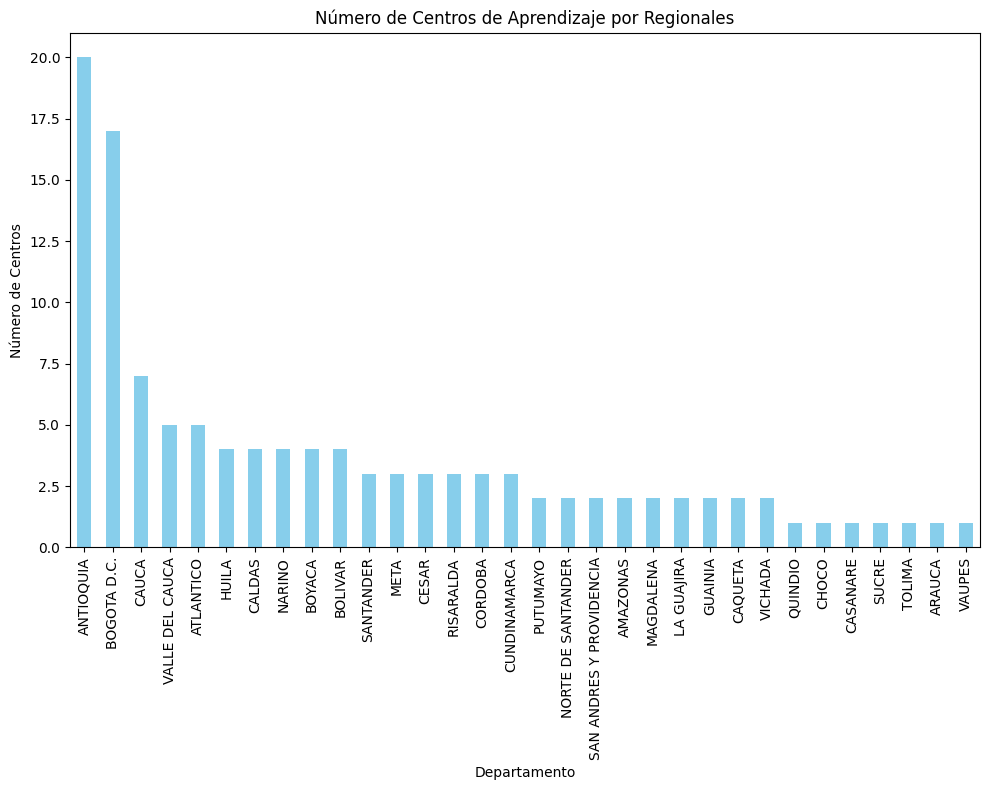

In [22]:
plt.figure(figsize=(10, 8))
numero_centros_ordenados.plot(kind='bar', color='skyblue')
plt.title('Número de Centros de Aprendizaje por Regionales')
plt.xlabel('Departamento')
plt.ylabel('Número de Centros')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

####**Distribución por regionales:**

La gráfica de barras muestra la cantidad de centros de aprendizaje por regionales. Se observa una mayor concentración en departamentos como Antioquia y Bogotá D.C., lo que sugiere una tendencia a concentrar más centros en áreas más pobladas o de mayor actividad económica.

In [23]:
pip install folium

In [24]:
import folium

mapa = folium.Map(location=[4.5709, -74.2973], zoom_start=5)

for index, row in df_sin_duplicados.iterrows():
    folium.Marker([row['LATITUD'], row['LONGITUD']], popup=row['CENTRO_FORMACION']).add_to(mapa)

mapa

#####***Conclusiones Generales ***
*Integridad y Limpieza de los Datos*: El conjunto de datos inicial contiene duplicados y valores nulos que fueron identificados y eliminados, lo cual es crucial para asegurar la calidad y precisión de cualquier análisis posterior. La estandarización ayuda a mantener la consistencia en los datos y facilita su uso en análisis y visualizaciones.


*Número de Centros por Departamento*: El agrupamiento y conteo de centros por departamento muestra una distribución desigual, con algunos departamentos teniendo una mayor cantidad de centros que otros. Esto podría reflejar diferencias en la demanda de formación profesional, la densidad de población, o políticas regionales de educación y formación. El análisis de los datos muestra que algunos departamentos tienen una mayor concentración de centros de formación.
Estos departamentos podrían ser el foco de futuros estudios para entender las razones detrás de esta concentración.

*Visualización de la Distribución por Región*: La gráfica de barras muestra la distribución de los centros de formación por región. Las regiones con mayor cantidad de centros podrían ser las más industrializadas o aquellas con mayor población estudiantil.



*Distribución Geográfica de los Centros de Formación*: La visualización de los datos en un mapa interactivo con Folium muestra la dispersión geográfica de los centros de formación. Esto puede ayudar a identificar áreas con alta concentración de centros, así como regiones que pueden estar desatendidas.

*Validación Final*: La validación final asegura que después de la limpieza y estandarización, no queden valores nulos ni duplicados, garantizando así la calidad de los datos para cualquier análisis adicional.

####Implicaciones prácticas:####

Planificación y Distribución de Recursos:
*	Las autoridades del SENA y otros organismos educativos pueden utilizar esta
información para planificar la distribución de recursos y la apertura de nuevos centros de formación en regiones que actualmente están desatendidas.
*	La identificación de áreas con alta concentración de centros puede ayudar a redistribuir o expandir programas de formación para equilibrar la oferta educativa en todo el país.

Políticas Educativas Regionales:
*	La información sobre la distribución de centros por departamento y región puede informar las políticas educativas regionales y ayudar a diseñar estrategias que aborden las necesidades específicas de cada área.

Mejoras en la Calidad de Datos:
 *	El proceso de limpieza y estandarización de datos destaca la importancia de mantener bases de datos limpias y estandarizadas para facilitar análisis precisos y útiles.

###**Recomendaciones Futuras:**###

Análisis Demográficos y Socioeconómicos:
*	Realizar análisis adicionales que correlacionen la distribución de los centros con variables demográficas y socioeconómicas, como población, tasa de desempleo y nivel educativo de la región.

Estudio de Demanda:
*	Investigar la demanda de formación profesional en diferentes regiones para ajustar la oferta de cursos y programas a las necesidades locales.

Monitoreo Continuo:
*	Establecer un sistema de monitoreo continuo de los datos para mantener actualizada la información sobre los centros de formación y detectar rápidamente cualquier anomalía o necesidad de actualización.